## 导入包

In [1]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from my_tools import *

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
jibing_res = pd.read_excel("./jibing_feature_res_final.xlsx")
jibing = pd.read_excel("./jibing_feature_final.xlsx")

In [4]:
jibing.head()

,左右,是否外伤,症状持续时间,明显夜间痛,年龄,高血压,高血脂,2型糖尿病,吸烟与否,饮酒与否,...,腺苷脱氨酶ADA,果糖胺,肌酸激酶,α-L-盐藻糖苷酶,乳酸,淀粉酶,同型半胱氨酸,铁,总铁结合力,血型
0,1,0,3,0,49,0,0,0,1,1,...,22.0,1.42,43.0,22.0,1.10,86.0,12.2,8.0,38.9,3
1,1,0,4,0,45,0,0,0,0,0,...,12.0,1.94,104.0,25.6,2.12,98.0,16.8,18.3,47.6,3
2,1,0,4,1,63,0,0,0,0,0,...,11.0,1.94,115.0,21.0,0.80,69.0,10.8,15.8,54.2,0
3,1,0,3,0,65,0,0,0,0,0,...,19.0,2.39,141.0,28.0,1.50,67.0,18.5,20.4,50.8,0
4,1,0,4,0,65,1,0,0,0,0,...,11.0,2.22,78.0,26.0,1.80,82.0,9.3,12.0,53.6,2


In [5]:
jibing_res.head()

,结果
0,0
1,0
2,0
3,1
4,0


### 归一化

In [6]:
jibing = guiyihua(jibing)

### 标准化

In [7]:
jibing = biaozhunhua(jibing)

In [8]:
jibing.iloc[0]

左右               1.000000
是否外伤             0.000000
症状持续时间           3.000000
明显夜间痛            0.000000
年龄              -0.782967
高血压              0.000000
高血脂              0.000000
2型糖尿病            0.000000
吸烟与否             1.000000
饮酒与否             2.220159
红细胞计数*10^12/L   -0.100346
血红蛋白            -1.062727
红细胞压积           -0.712083
血小板计数            0.601403
血小板压积           -0.018775
总蛋白g/L           1.362433
白蛋白g/L           0.504105
球蛋白g/L           1.402628
白球比             -0.742195
AST天门冬氨酸氨基转移酶   -0.776387
碱性磷酸酶           -0.836542
谷氨酸转肽酶          -0.425771
AST:ALT          0.210464
总胆红素            -0.818293
直接胆红素            0.595279
间接胆红素           -1.230900
钾               -0.317774
钠               -0.887191
氯               -0.210961
钙                0.477400
磷                2.182514
镁                1.032615
葡萄糖             -0.271927
肌酐              -0.506974
尿素              -1.347595
尿酸              -0.536631
甘油三酯            -0.140851
总胆固醇            -0.737608
H高密度胆固醇     

### 要调的参数
- penalty：惩罚项，L1 正则化和 L2 正则化。
L2 正则化通常会导致模型的参数值变小，使得模型的决策边界会更平滑。它也可以帮助防止过拟合。所以这里选择l2 正则化
- c:正则化系数的倒数
- 对于l2 正则化，可以选择 newton-cg，lbfgs，saga

  saga:随机平均梯度下降
  
  newton-cg:类似于牛顿法
  
  lbfgs:一种梯度下降的方法

### 确定用于网格搜索的字典

In [9]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['newton-cg', 'saga','lbfgs']}

### 创建模型并进行网格搜索

In [10]:
logistic_regression = LogisticRegression(random_state=30)
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5)

In [11]:
grid_search.fit(jibing, jibing_res)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=30),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['newton-cg', 'saga', 'lbfgs']})

### 获取最佳参数
#### 牛顿法更加适合这个模型

In [12]:
c = grid_search.best_params_['C']
solver = grid_search.best_params_['solver']
print("c={},solver={}".format(c,solver))

c=0.001,solver=newton-cg


### 训练

In [13]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(jibing,jibing_res,test_size=0.3)
clf = LogisticRegression(C=c, solver=solver,random_state=30)
clf.fit(Xtrain, Ytrain)
# 预测
y_pre = clf.predict(Xtest)
metrics_ = res_metrics(Ytest,y_pre,"逻辑回归")

#######################逻辑回归#######################
+-----------+--------+-----+
| precision | recall |  f1 |
+-----------+--------+-----+
|    0.0    |  0.0   | 0.0 |
+-----------+--------+-----+


### 这中结果可能是样本不均衡导致的

In [14]:
print("测试标签中有{}个阳性，预测的样本中有{}个阳性。".format(y_pre.sum(),Ytest["结果"].sum()))

测试标签中有0个阳性，预测的样本中有64个阳性。


### 一个阳性也没有检测出来

## 为解决样本不均衡问题
## 使用 RandomOverSampler 补充数据

In [15]:
f1_list = []
sampling_strategy_list = []
for rot in np.linspace(0.5,1,10):
    # 过采样
    sampler = RandomOverSampler(sampling_strategy=rot, random_state=42)
    X_resampled, y_resampled = sampler.fit_resample(jibing,jibing_res)
    Xtrain,Xtest,Ytrain,Ytest = train_test_split(X_resampled,y_resampled,test_size=0.2)
    # 训练，拟合
    clf = LogisticRegression(random_state=30)
    clf.fit(Xtrain, Ytrain)
    # 预测
    y_pre = clf.predict(Xtest)
    metrics_ = res_metrics(Ytest,y_pre,"调参")
    # 添加到列表中
    sampling_strategy_list.append(rot)
    f1_list.append(metrics_["f1-score"])

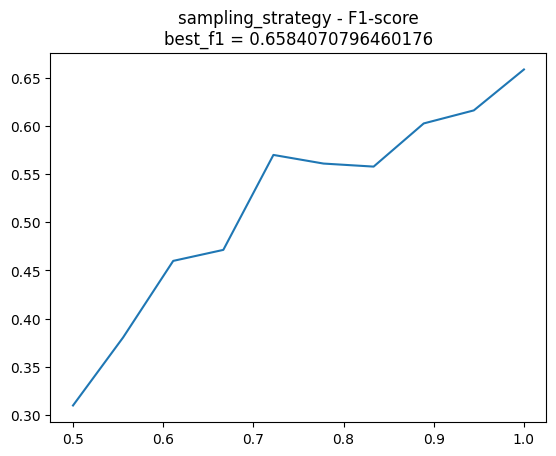

In [16]:
zhexiantu(sampling_strategy_list,f1_list,"sampling_strategy - F1-score\nbest_f1 = {}".format(max(f1_list)))

### 查看曲线

In [17]:
clf = LogisticRegression(random_state=30)
sampler = RandomOverSampler(sampling_strategy=1, random_state=42)
X_resampled, y_resampled = sampler.fit_resample(jibing,jibing_res)
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X_resampled,y_resampled,test_size=0.3)
# 训练，拟合
clf = LogisticRegression(random_state=42)
clf.fit(Xtrain, Ytrain)
# 预测
y_pre = clf.predict(Xtest)
metrics_ = res_metrics(Ytest,y_pre,"调参")
# 添加到列表中
sampling_strategy_list.append(rot)
f1_list.append(metrics_["f1-score"])
clf.fit(Xtrain, Ytrain)
y_pre = clf.predict(Xtest)
metrics_ = res_metrics(Ytest,y_pre,"未调参的逻辑回归")

#####################未调参的逻辑回归#####################
+--------------------+--------------------+-------+
|     precision      |       recall       |   f1  |
+--------------------+--------------------+-------+
| 0.6310679611650486 | 0.6190476190476191 | 0.625 |
+--------------------+--------------------+-------+


### 让两类标签数量相同的时候可以更好地学习阳性患者的一些特征

### 下面进行网格搜索，寻找最佳的参数

### 要调的参数
- penalty：惩罚项，L1 正则化和 L2 正则化。
L2 正则化通常会导致模型的参数值变小，使得模型的决策边界会更平滑。它也可以帮助防止过拟合。所以这里选择l2 正则化
- c:正则化系数的倒数
- 对于l2 正则化，可以选择 newton-cg，lbfgs，saga

  saga:随机平均梯度下降
  
  newton-cg:类似于牛顿法
  
  lbfgs:一种梯度下降的方法

In [18]:
# 过采样
sampler = RandomOverSampler(sampling_strategy=1, random_state=42)
X_resampled, y_resampled = sampler.fit_resample(jibing,jibing_res)
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X_resampled,y_resampled,test_size=0.3)

### 确定用于网格搜索的字典

In [19]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'solver': ['newton-cg', 'saga','lbfgs']}

### 创建模型并进行网格搜索

In [20]:
logistic_regression = LogisticRegression(random_state=30)
grid_search = GridSearchCV(estimator=logistic_regression, param_grid=param_grid, cv=5)

In [21]:
grid_search.fit(X_resampled, y_resampled)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=30),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'solver': ['newton-cg', 'saga', 'lbfgs']})

### 获取最佳参数
#### 牛顿法更加适合这个模型

In [22]:
C = grid_search.best_params_['C']
solver = grid_search.best_params_['solver']
print("c={},solver={}".format(C,solver))

c=100,solver=newton-cg


In [23]:
# 训练，拟合
clf = LogisticRegression(C=C,solver=solver,random_state=42)
clf.fit(Xtrain, Ytrain)
y_pre = clf.predict(Xtest)
metrics_ = res_metrics(Ytest,y_pre,"调参后的逻辑回归")

#####################调参后的逻辑回归#####################
+-------------------+--------------------+--------------------+
|     precision     |       recall       |         f1         |
+-------------------+--------------------+--------------------+
| 0.669047619047619 | 0.6444954128440367 | 0.6565420560747663 |
+-------------------+--------------------+--------------------+


### f1-score 达到了 0.65
### f1-score 比调参前高了0.02